# Deep Learning Midterm

- Subject Code: CS 7150
- Professor Name: Jiaji Liu
- Student Name: Varun Guttikonda
- NUID: 002697400

## Problem Set 1 - Conv Layer and its gradient

### Question 1
Design a $3 \times 3$ convolutional filter to detect the edges in an image.

#### Answer
There are many filters to detect the edges of a image. These are based on the gradient of the image. I will list the most common Sobel filter used in edge detection.

The Sobel filter is a $3 \times 3$ filter that is used to detect the edges in an image. It is based on the gradient of the image. The filter is defined as follows:

$$
G_x = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}

G_y = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}
$$

The $G_x$ filter is used to detect the edges in the horizontal direction and the $G_y$ filter is used to detect the edges in the vertical direction. We can also combine these two filters into a matrix $G$ which is the magnitude of the gradient of the image.

$$
G = \sqrt{G_x^2 + G_y^2}
$$


### Question 2
Denote the input 2D image as **I**(x, y), output image due to edge detector as **O**(x, y). Suppose we incurred a loss $l$ on **O**. The gradient of $l$ with respect to **O**(x, y) is $\frac{\partial l}{\partial O(x, y)}$. Derive the gradient of loss $l$ with respect to the input image **I**(x, y).

#### Answer

The gradient of the loss $l$ with respect to the input image **I**(x, y) can be derived using the chain rule. The chain rule states that the derivative of a composite function is the product of the derivatives of the individual functions. In this case, the loss $l$ is a function of the output image **O**(x, y) and the output image **O**(x, y) is a function of the input image **I**(x, y). Therefore, the gradient of the loss $l$ with respect to the input image **I**(x, y) can be derived using the chain rule as follows:

$$
\frac{\partial l}{\partial I(x, y)} = \frac{\partial l}{\partial O(x, y)} \cdot \frac{\partial O(x, y)}{\partial I(x, y)}
$$

### Question 3
If we stack many convolution and ReLU layers after **O**, what would be a potential issue if we trained this network using gradient descent? How could we mitigate this issue?

#### Answer

There might be any number of potential issues when this kind of network is trained. I have listed some of them I could think of.
1. **Explosion of Feature Maps**: The number of feature maps can explode as we stack more and more convolutional layers. This can lead to overfitting and slow training times. To mitigate this issue, we can use techniques such as batch normalization and dropout to regularize the network and prevent overfitting. We can also use techniques like pooling to reduce the number of feature maps and speed up training.
2. **Vanishing Gradients**: As we stack more and more convolutional layers, the gradients can become very small and vanish. This can lead to slow training times and poor performance. To mitigate this issue, we can use techniques such as skip connections and residual connections to allow the gradients to flow more easily through the network. We can also use techniques such as gradient clipping to prevent the gradients from becoming too small.
3. **Overfitting**: As we stack more and more convolutional layers, the network can become very complex and overfit the training data. This can lead to poor generalization and poor performance on new data. To mitigate this issue, we can use techniques such as dropout and regularization to prevent overfitting. We can also use techniques such as data augmentation to increase the size of the training data and prevent overfitting.

## Problem Set 2 - Backpropagation through Time

Consider a simple RNN model with scalar input $x_t$ and scalar hidden state $$h_t = a \cdot x_t + b \cdot h_{t-1}$$ where $1 \le t \le T$, we incur some loss $l$ on the last hidden state $h_T$.

### Question 1
Denote the gradient of $l$ w.r.t $h_T$ as $\frac{\partial l}{\partial h_T}$. Derive the gradient of $l$ w.r.t $a$ and $b$.

#### Answer

The gradient of the loss $l$ with respect to the parameters $a$ and $b$ can be derived using the chain rule. The chain rule states that the derivative of a composite function is the product of the derivatives of the individual functions. In this case, the loss $l$ is a function of the last hidden state $h_T$ and the last hidden state $h_T$ is a function of the parameters $a$ and $b$. Therefore, the gradient of the loss $l$ with respect to the parameters $a$ and $b$ can be derived using the chain rule as follows:

$$
\frac{\partial l}{\partial a} = \frac{\partial l}{\partial h_T} \cdot \frac{\partial h_T}{\partial a}
$$
But we can derive the second term as follows:
$$ \frac{\partial h_T}{\partial a} = x_T $$
So substituting this back into the first equation we get:
$$ \frac{\partial l}{\partial a} = \frac{\partial l}{\partial h_T} \cdot x_T $$

$$
\frac{\partial l}{\partial b} = \frac{\partial l}{\partial h_T} \cdot \frac{\partial h_T}{\partial b}
$$

Similarly, we can derive the second term as follows:
$$ \frac{\partial h_T}{\partial b} = h_{T-1} $$
So substituting this back into the first equation we get:
$$ \frac{\partial l}{\partial b} = \frac{\partial l}{\partial h_T} \cdot h_{T-1} $$


### Question 2
What could be a potential issue if $T$ is very large? How could we mitigate this issue?

#### Answer
If $T$ is very large, then when we unroll the network and train using backpropagation through time, the gradients can become very small and vanish. This can lead to slow training times and poor performance. To mitigate this issue, we can use techniques such as gradient clipping to prevent the gradients from becoming too small. We can also use techniques such as skip connections and residual connections to allow the gradients to flow more easily through the network. We can also use techniques such as batch normalization and dropout to regularize the network and prevent overfitting.

Another solution is to use a different type of RNN cell like LSTM or GRU which are designed to mitigate the vanishing gradient problem. These cells have gating mechanisms that allow the gradients to flow more easily through the network and prevent them from becoming too small.


## Problem Set 3 - Postional Encoding

### Question 1
Describe when and why we need Positional Encoding in the context of Transformer model.

#### Answer
The Transformer model is a type of neural network architecture that is used for natural language processing tasks such as machine translation and language modeling. The Transformer model is based on the self-attention mechanism, which allows the model to attend to different parts of the input sequence at different positions. However, the self-attention mechanism does not have any notion of position, so it cannot distinguish between different positions in the input sequence. This can be a problem for tasks such as machine translation, where the position of a word in the input sequence can affect its meaning.

To address this issue, the Transformer model uses positional encoding to inject information about the position of each token in the input sequence. Positional encoding is added to the input embeddings of the tokens, so that the model can distinguish between different positions in the input sequence. This allows the model to attend to different parts of the input sequence at different positions, and helps the model to capture the positional information of the input sequence.

### Question 2
Consider $d$-dimensional sinusoidal PE for the $t$-th position, defined as $$p_t = [\dots, \sin(w_kt),\cos(w_kt),\dots], k= 0, \dots, (d/ 2) - 1$$ where $w_k = \frac{1}{10000^{2k/d}}$. The PE is added to token embeddings $x_t$ i.e. $y_t = x_t + p_t$.  

Analyze the effect of PE. More specifically how does $y_t \dot y_{\tau}$ compare against $x_t \dot x_{\tau}$? Discuss the impact of attention.

#### Answer
The positional encoding is added to the token embeddings to inject information about the position of each token in the input sequence. The positional encoding is a $d$-dimensional sinusoidal function that is added to the token embeddings, so that the model can distinguish between different positions in the input sequence. The positional encoding is defined as follows:

$$
p_t = [\dots, \sin(w_kt),\cos(w_kt),\dots], k= 0, \dots, (d/ 2) - 1
$$

Where $w_k = \frac{1}{10000^{2k/d}}$. The positional encoding is added to the token embeddings as follows:

$$
y_t = x_t + p_t
$$

When we add these positional embeddings, the original token embeddings are modified to include information about the position of each token in the input sequence. So this essenstially creates a new embedding space where same words with different positions have different embeddings. This allows the model to distinguish between different positions in the input sequence and helps the model to capture the positional information of the input sequence.

When we multiply the positional embeddings $y_t$ and $y_{tau}$, we are essentially comparing the similarity between the words and its position. When this is not done and we only use the token embeddings $x_t$ and $x_{tau}$, the model cannot distinguish between different positions in the input sequence. This can be a problem for tasks such as machine translation, where the position of a word in the input sequence can affect its meaning. The positional encoding allows the model to attend to different parts of the input sequence at different positions, and helps the model to capture the positional information of the input sequence. This is especially important for the self-attention mechanism, which allows the model to attend to different parts of the input sequence at different positions.

## Problem Set 4 - Model Design
You want to create a grammar error correction model.

### Question 1
Sketch the overall model architecture, describe each building block and give as much detail as possible.

#### Answer
The overall model architecture consists of an encoder-decoder architecture with an attention mechanism. The encoder takes the input sentence and encodes it into a sequence of hidden states. The decoder takes the hidden states and generates the output sentence. The attention mechanism allows the decoder to focus on different parts of the input sentence at different time steps.

The encoder consists of an embedding layer, a stack of LSTM layers, and a self-attention mechanism. The embedding layer converts the input sentence into a sequence of word embeddings. The LSTM layers encode the word embeddings into a sequence of hidden states. The self-attention mechanism allows the encoder to focus on different parts of the input sentence at different time steps.

The decoder consists of an embedding layer, a stack of LSTM layers, and an attention mechanism. The embedding layer converts the output sentence into a sequence of word embeddings. The LSTM layers decode the word embeddings into a sequence of hidden states. The attention mechanism allows the decoder to focus on different parts of the input sentence at different time steps.

The attention mechanism consists of a query, key, and value matrix. The query matrix is the hidden state of the decoder at a given time step. The key matrix is the hidden states of the encoder. The value matrix is the hidden states of the encoder. The attention mechanism computes the attention weights by taking the dot product of the query and key matrices and then applying a softmax function. The attention weights are then used to compute the context vector, which is a weighted sum of the value matrix. The context vector is then concatenated with the hidden state of the decoder and used to generate the output word.

### Question 2
What is the input and the output of the model? How would you train the model? Give as much detail as possible i.e. training loss, any tricks that can benefit the training process, etc.

#### Answer
The input of the model is a sequence of words representing a sentence with grammar errors. The output of the model is a sequence of words representing a corrected sentence.

The model is trained using a sequence-to-sequence loss function such as cross-entropy loss. The loss is computed between the predicted output sentence and the ground truth output sentence. The loss is then backpropagated through the model to update the parameters.

To train the model, we can use techniques such as teacher forcing, which involves using the ground truth output sentence as input to the decoder during training. This can help to stabilize the training process and prevent the model from getting stuck in local minima.

We can also use techniques such as scheduled sampling, which involves using the predicted output sentence as input to the decoder with a certain probability during training. This can help to improve the generalization of the model and prevent overfitting.

We can also use techniques such as beam search, which involves exploring multiple candidate output sentences during inference and selecting the one with the highest probability. This can help to improve the quality of the output sentences and prevent the model from getting stuck in local minima.

We can also use techniques such as attention regularization, which involves adding a regularization term to the loss function that encourages the attention weights to be sparse. This can help to improve the interpretability of the attention mechanism and prevent the model from overfitting.

### Question 3
At test time, how would you generate the grammar corrected sentence? What metric would you use to evaluate the quality of the model?

#### Answer
At test time, we would generate the grammar corrected sentence using beam search. Beam search involves exploring multiple candidate output sentences and selecting the one with the highest probability. This can help to improve the quality of the output sentences and prevent the model from getting stuck in local minima.

We would use the BLEU score to evaluate the quality of the model. The BLEU score is a metric that measures the similarity between the predicted output sentence and the ground truth output sentence. It is based on the precision and recall of the n-grams in the predicted output sentence. A higher BLEU score indicates a higher quality of the model.

The formula for BLEU score is as follows:

$$
BLEU = BP \cdot \exp(\sum_{n=1}^{N} w_n \cdot \log(p_n))
$$

Where $BP$ is the brevity penalty, $w_n$ is the weight for n-grams, and $p_n$ is the precision of n-grams. The brevity penalty is a term that penalizes the model for generating shorter output sentences. The weights for n-grams are used to give more importance to certain n-grams in the output sentence. The precision of n-grams is the ratio of the number of n-grams in the predicted output sentence that are also in the ground truth output sentence to the total number of n-grams in the predicted output sentence.

Another way of evaluating the model is to use this model for a downstream task like machine translation and evaluate the performance of the downstream task. This can give a better understanding of the model's performance in a real-world scenario.

## Problem Set 5 - Optimization and Generalization

We use the MNIST dataset for this question. Please attach all your code. Details regarding the MNIST dataset can be found in HW-2. Again we use the following code to create training, validation and test splits.

```python
import torch
from torchvision import datasets

train_all = datasets.MNIST('../data', train=True, download=True) # 60K images
train_data, val_data = torch.utils.data.random_split(train_all, [50000, 10000], torch.Generator().manual_seed(0)) # train: 50K; val: 10K
test_data = datasets.MNIST('../data', train=False) # 10K images
```

In [1]:
import warnings

import lightning as L
import matplotlib.pyplot as plt
import numpy as np
import torch
from PIL import Image
from torch import nn
from torchvision import datasets, transforms

# Filter warnings
warnings.filterwarnings("ignore")

# Set device for acceleration
DEVICE = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

if DEVICE == "mps":
    torch.mps.empty_cache()
elif DEVICE == "cuda":
    torch.cuda.empty_cache()

print(
    "Using CPU for training and testing as no accelerator is available."
    if DEVICE == "cpu"
    else f"Using {DEVICE} for accleration."
)

Using mps for accleration.


In [2]:
HYPERPARAMETERS = {
    "batch_size": 128,
    "learning_rate": 0.01,
    "epochs": 15,
}

In [3]:
# Create one-hot encoding transformation for labels
one_hot_transform = transforms.Compose(
    [transforms.Lambda(lambda y: torch.zeros(10).scatter_(0, torch.tensor(y), 1))]
)

# Create a toTensor transformation for images
to_tensor_transform = transforms.Compose([transforms.ToTensor()])

In [4]:
train_all = datasets.MNIST(
    "../data",
    train=True,
    download=True,
    transform=to_tensor_transform,
    target_transform=one_hot_transform,
)
train_data, val_data = torch.utils.data.random_split(
    train_all, [50_000, 10_000], torch.Generator().manual_seed(0)
)
test_data = datasets.MNIST(
    "../data",
    train=False,
    download=True,
    transform=to_tensor_transform,
    target_transform=one_hot_transform,
)

# Create data loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=HYPERPARAMETERS["batch_size"], shuffle=True
)
val_loader = torch.utils.data.DataLoader(
    val_data, batch_size=HYPERPARAMETERS["batch_size"], shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=HYPERPARAMETERS["batch_size"], shuffle=True
)

In [5]:
def train(
    model, optimizer, criterion, train_loader, val_loader=None, epochs=15, device="cpu"
):
    _epoch_wise_train_loss = []
    _epoch_wise_val_loss = []

    _epoch_wise_train_accuracy = []
    _epoch_wise_val_accuracy = []

    try:
        _n_batches = len(train_loader)
        _max_char_epoch, _max_char_batch = len(str(epochs)), len(str(_n_batches))

        # BATCH TRAIN FORMAT STRING
        def _batch_train_message(i_epoch, i_batch):
            return f"Epoch {i_epoch:>{_max_char_epoch}}/{epochs} Batch: [{i_batch:>{_max_char_batch}}/{_n_batches}]"

        # CREATE EPOCH TRAIN FORMAT STRING
        def _epoch_train_message(
            i_epoch, i_batch, t_loss, t_accuracy, v_loss=None, v_accuracy=None
        ):
            return (
                f"Epoch {i_epoch:>{_max_char_epoch}}/{epochs} Batch: [{i_batch:>{_max_char_batch}}/{_n_batches}] Train Loss: {t_loss:.4f} Train Accuracy: {t_accuracy:.4f}"
                if v_loss is None or v_accuracy is None
                else f"Epoch {i_epoch:>{_max_char_epoch}}/{epochs} Batch: [{i_batch:>{_max_char_batch}}/{_n_batches}] Train Loss: {t_loss:.4f} Train Accuracy: {t_accuracy:.4f} Val Loss: {v_loss:.4f} Val Accuracy: {v_accuracy:.4f}"
            )

        # Move model to device
        model.to(device)
        print(f"Model moved to {device}.")

        # Train the model
        print("++++++++++ MODEL TRAINING STARTS ++++++++++")

        for epoch in range(1, epochs + 1):
            _batch_wise_train_loss = []
            _batch_wise_accuracy = []

            # Run batches
            for batch_idx, (data, labels) in enumerate(train_loader, 1):
                model.train()
                print(_batch_train_message(epoch, batch_idx), end="\r")

                # Move data to device
                data, labels = data.to(device), labels.to(device)

                # Zero the gradients
                optimizer.zero_grad()

                # Forward pass
                outputs = model(data)

                # Get accuracy
                batch_accuracy = torch.sum(
                    torch.argmax(outputs, dim=1) == torch.argmax(labels, dim=1)
                ).item() / len(labels)
                _batch_wise_accuracy.append(batch_accuracy)

                loss = criterion(outputs, labels)
                _batch_wise_train_loss.append(loss.item())

                loss.backward()
                optimizer.step()

                del data, labels, outputs, loss

            _t_loss = torch.mean(torch.tensor(_batch_wise_train_loss))
            _t_accuracy = torch.mean(torch.tensor(_batch_wise_accuracy))

            _epoch_wise_train_loss.append(_t_loss.item())
            _epoch_wise_train_accuracy.append(_t_accuracy)

            # Validation
            if val_loader:
                model.eval()

                with torch.no_grad():
                    _batch_wise_val_loss = []
                    _batch_wise_accuracy = []

                    for data, labels in val_loader:
                        data, labels = data.to(device), labels.to(device)
                        outputs = model(data)

                        accuracy = torch.sum(
                            torch.argmax(outputs, dim=1) == torch.argmax(labels, dim=1)
                        ).item() / len(labels)
                        _batch_wise_accuracy.append(accuracy)

                        loss = criterion(outputs, labels)
                        _batch_wise_val_loss.append(loss.item())
                        _, predictions = torch.max(outputs, 1)

                        del data, labels, outputs, loss, predictions

                    _v_loss = torch.mean(torch.tensor(_batch_wise_val_loss))
                    _epoch_wise_val_loss.append(_v_loss.item())

                    _v_accuracy = torch.mean(torch.tensor(_batch_wise_accuracy))
                    _epoch_wise_val_accuracy.append(_v_accuracy.item())

            print(
                _epoch_train_message(
                    epoch, batch_idx, _t_loss, _t_accuracy, _v_loss, _v_accuracy
                )
            )

    except RuntimeError as re:
        print("++++++++++ MODEL TRAINING ENDS ++++++++++")
        print("Some error occurred. Training stopped.")
        print(re)
        return
    except KeyboardInterrupt:
        print("\n")
        print("++++++++++ MODEL TRAINING ENDS ++++++++++")
        print("Training interrupted.")

    print("++++++++++ MODEL TRAINING ENDS ++++++++++")
    print("Training completed.")
    return {
        "train_loss": _epoch_wise_train_loss,
        "val_loss": _epoch_wise_val_loss,
        "train_accuracy": _epoch_wise_train_accuracy,
        "val_accuracy": _epoch_wise_val_accuracy,
    }


def test(model, test_loader, criterion, device="cpu"):
    model.to(device)

    _n_test_batches = len(test_loader)
    _max_char_batch = len(str(_n_test_batches))

    _test_accuracy, _test_loss = [], []

    for batch_idx, (data, labels) in enumerate(test_loader, 1):
        # Set model to eval mode
        model.eval()

        # Log the batch testing
        print(f"Batch: [{batch_idx:>{_max_char_batch}}/{_n_test_batches}]", end="\r")

        # Move data and label to device
        data, labels = data.to(device), labels.to(device)

        # Forward pass
        outputs = model(data)

        # Get accuracy
        _accuracy = torch.sum(
            torch.argmax(outputs) == torch.argmax(labels)
        ).item() / len(labels)

        _test_loss.append(criterion(outputs, labels).item())
        _test_accuracy.append(_accuracy)

    # Finally move model back to CPU so that other models can use the GPU
    model.to("cpu")

    return {
        "test_loss": torch.mean(torch.tensor(_test_loss)).item(),
        "test_accuracy": torch.mean(torch.tensor(_test_accuracy)).item(),
    }

### Question 1
Implement LeNet Architecture and train on all 50K training samples with vanilla SGD. Report the learning curves and the test accuracy.

#### Answer
The image of the LeNet architecture is as follows:  


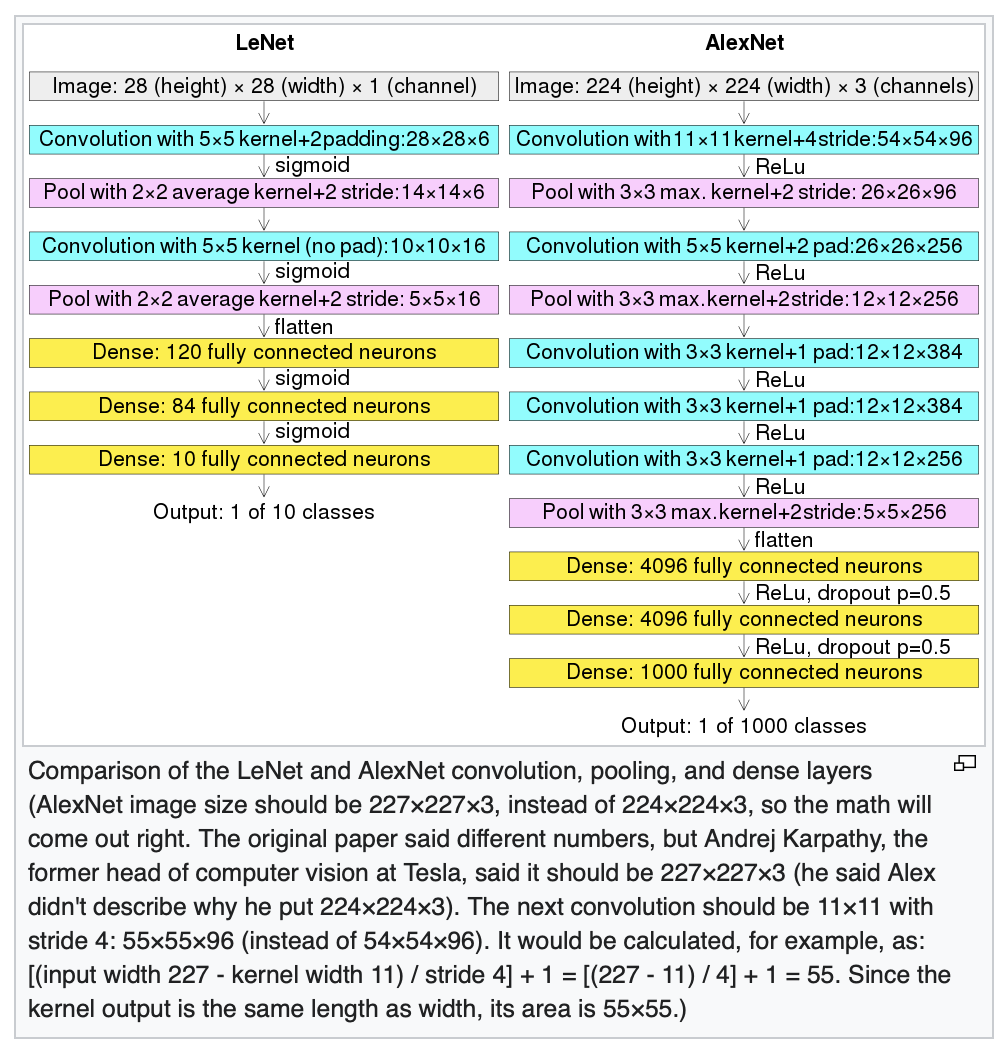

In [6]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()

        # Define the model architecture
        self.model = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, kernel_size=5, stride=1),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(in_features=16 * 5 * 5, out_features=120),
            nn.Sigmoid(),
            nn.Linear(in_features=120, out_features=84),
            nn.Linear(in_features=84, out_features=10),
            nn.Softmax(dim=1),
        )

    def forward(self, x):
        # Model returns the probability of each class
        return self.model(x)


le_net = LeNet()

# Define the loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(le_net.parameters(), lr=HYPERPARAMETERS["learning_rate"])

q1_history = train(
    le_net,
    optimizer,
    criterion,
    train_loader,
    val_loader,
    epochs=HYPERPARAMETERS["epochs"],
    device=DEVICE,
)

q1_test = test(le_net, test_loader, criterion, device=DEVICE)

Model moved to mps.
++++++++++ MODEL TRAINING STARTS ++++++++++
Epoch  1/15 Batch: [391/391] Train Loss: 2.3026 Train Accuracy: 0.1003 Val Loss: 2.3024 Val Accuracy: 0.0981
Epoch  2/15 Batch: [391/391] Train Loss: 2.3024 Train Accuracy: 0.1028 Val Loss: 2.3023 Val Accuracy: 0.0988
Epoch  3/15 Batch: [391/391] Train Loss: 2.3022 Train Accuracy: 0.1111 Val Loss: 2.3022 Val Accuracy: 0.1108
Epoch  4/15 Batch: [391/391] Train Loss: 2.3021 Train Accuracy: 0.1129 Val Loss: 2.3021 Val Accuracy: 0.1101
Epoch  5/15 Batch: [391/391] Train Loss: 2.3019 Train Accuracy: 0.1129 Val Loss: 2.3020 Val Accuracy: 0.1101
Epoch  6/15 Batch: [391/391] Train Loss: 2.3018 Train Accuracy: 0.1129 Val Loss: 2.3019 Val Accuracy: 0.1101
Epoch  7/15 Batch: [391/391] Train Loss: 2.3016 Train Accuracy: 0.1128 Val Loss: 2.3019 Val Accuracy: 0.1101
Epoch  8/15 Batch: [391/391] Train Loss: 2.3015 Train Accuracy: 0.1128 Val Loss: 2.3018 Val Accuracy: 0.1108
Epoch  9/15 Batch: [391/391] Train Loss: 2.3015 Train Accuracy: 

In [7]:
# print test accuracy
print(f'The test accuracy is {q1_test["test_accuracy"]:.4f}.')

The test accuracy is 0.0000.


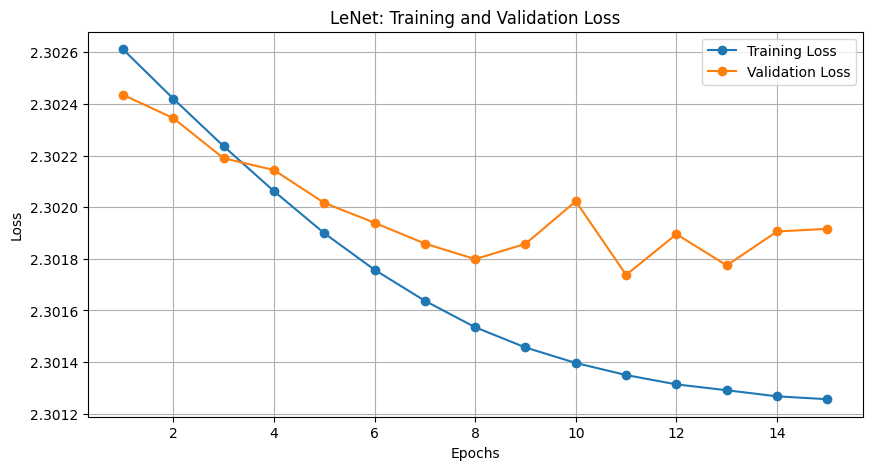

In [8]:
# plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(
    list(range(1, HYPERPARAMETERS["epochs"] + 1)),
    q1_history["train_loss"],
    label="Training Loss",
    marker="o",
)
plt.plot(
    list(range(1, HYPERPARAMETERS["epochs"] + 1)),
    q1_history["val_loss"],
    label="Validation Loss",
    marker="o",
)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("LeNet: Training and Validation Loss")
plt.grid(True)
plt.show()

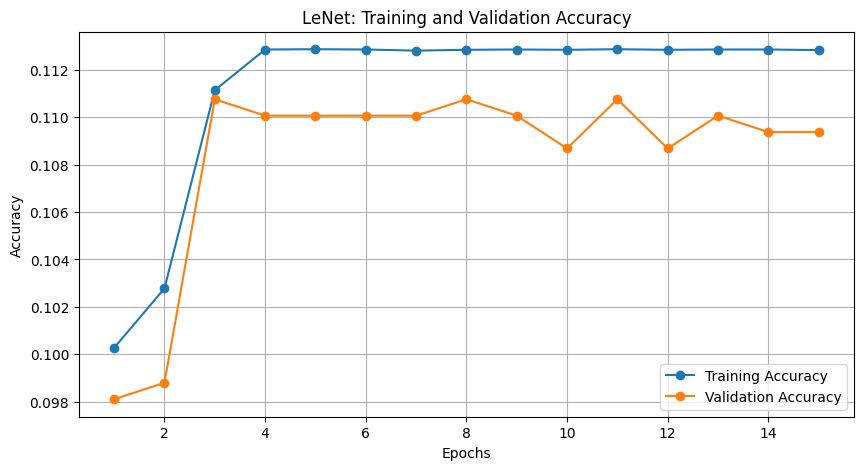

In [9]:
# plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(
    list(range(1, HYPERPARAMETERS["epochs"] + 1)),
    q1_history["train_accuracy"],
    label="Training Accuracy",
    marker="o",
)
plt.plot(
    list(range(1, HYPERPARAMETERS["epochs"] + 1)),
    q1_history["val_accuracy"],
    label="Validation Accuracy",
    marker="o",
)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("LeNet: Training and Validation Accuracy")
plt.grid(True)
plt.show()

### Question 2
How can we make the training loss converge faster? Implement your idea and compare the new training curve against that in question 1.

#### Answer
We can use techniques such as batch normalization and weight initialization to make the training loss converge faster. Batch normalization normalizes the input to each layer so that the gradients do not become too large or too small. This can help to stabilize the training process and prevent the model from getting stuck in local minima. Weight initialization initializes the weights of the model to small random values so that the gradients do not become too large or too small. This can help to prevent the model from getting stuck in local minima and improve the generalization of the model.

The implementation of the LeNet architecture with batch normalization is as follows:

In [10]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()

        # Define the model architecture with additional BatchNorm layers
        self.model = nn.Sequential(
            nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(6),
            nn.Conv2d(6, 16, kernel_size=5, stride=1),
            nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(16),
            nn.Flatten(),
            nn.Linear(in_features=16 * 5 * 5, out_features=120),
            nn.Sigmoid(),
            nn.Linear(in_features=120, out_features=84),
            nn.Linear(in_features=84, out_features=10),
            nn.Softmax(dim=1),
        )

    def forward(self, x):
        # Model returns the probability of each class
        return self.model(x)


le_net = LeNet()

# Define the loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(le_net.parameters(), lr=HYPERPARAMETERS["learning_rate"])

q2_history = train(
    le_net,
    optimizer,
    criterion,
    train_loader,
    val_loader,
    epochs=HYPERPARAMETERS["epochs"],
    device=DEVICE,
)

q2_test = test(le_net, test_loader, criterion, device=DEVICE)

Model moved to mps.
++++++++++ MODEL TRAINING STARTS ++++++++++
Epoch  1/15 Batch: [391/391] Train Loss: 2.3007 Train Accuracy: 0.1002 Val Loss: 2.2989 Val Accuracy: 0.0939
Epoch  2/15 Batch: [391/391] Train Loss: 2.2960 Train Accuracy: 0.1163 Val Loss: 2.2937 Val Accuracy: 0.1518
Epoch  3/15 Batch: [391/391] Train Loss: 2.2901 Train Accuracy: 0.2123 Val Loss: 2.2869 Val Accuracy: 0.2885
Epoch  4/15 Batch: [391/391] Train Loss: 2.2816 Train Accuracy: 0.3437 Val Loss: 2.2759 Val Accuracy: 0.3663
Epoch  5/15 Batch: [391/391] Train Loss: 2.2660 Train Accuracy: 0.3675 Val Loss: 2.2525 Val Accuracy: 0.3469
Epoch  6/15 Batch: [391/391] Train Loss: 2.2281 Train Accuracy: 0.3183 Val Loss: 2.1966 Val Accuracy: 0.2935
Epoch  7/15 Batch: [391/391] Train Loss: 2.1661 Train Accuracy: 0.3271 Val Loss: 2.1328 Val Accuracy: 0.3612
Epoch  8/15 Batch: [391/391] Train Loss: 2.1034 Train Accuracy: 0.3910 Val Loss: 2.0764 Val Accuracy: 0.4231
Epoch  9/15 Batch: [391/391] Train Loss: 2.0446 Train Accuracy: 

In [11]:
# print test accuracy
print(f'The test accuracy is {q2_test["test_accuracy"]:.4f}.')

The test accuracy is 0.0001.


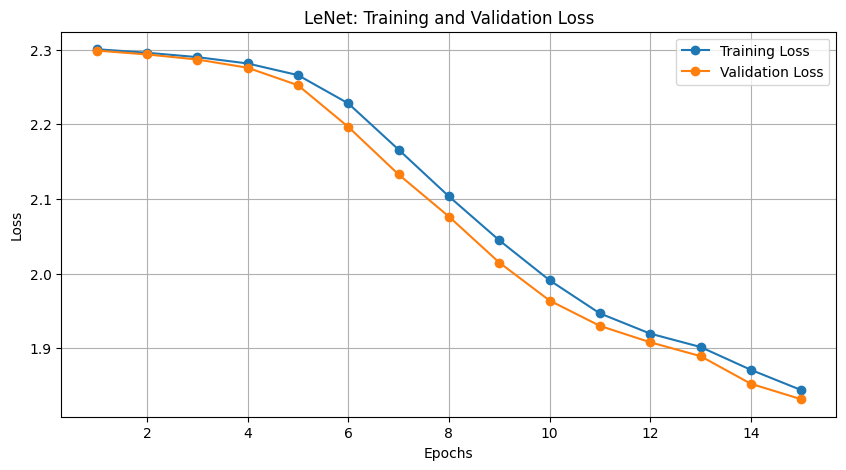

In [12]:
# plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(
    list(range(1, HYPERPARAMETERS["epochs"] + 1)),
    q2_history["train_loss"],
    label="Training Loss",
    marker="o",
)
plt.plot(
    list(range(1, HYPERPARAMETERS["epochs"] + 1)),
    q2_history["val_loss"],
    label="Validation Loss",
    marker="o",
)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("LeNet: Training and Validation Loss")
plt.grid(True)
plt.show()

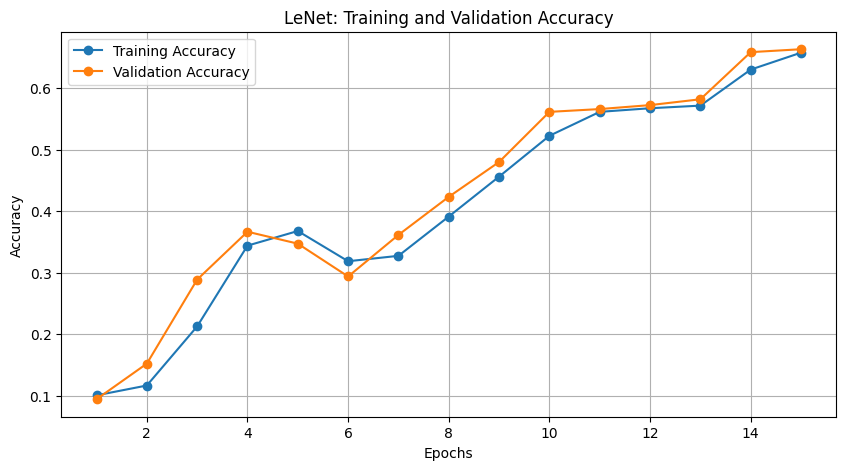

In [13]:
# plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(
    list(range(1, HYPERPARAMETERS["epochs"] + 1)),
    q2_history["train_accuracy"],
    label="Training Accuracy",
    marker="o",
)
plt.plot(
    list(range(1, HYPERPARAMETERS["epochs"] + 1)),
    q2_history["val_accuracy"],
    label="Validation Accuracy",
    marker="o",
)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("LeNet: Training and Validation Accuracy")
plt.grid(True)
plt.show()

As we can see from both graphs, the highest val accuracy achieved for Q1 is **11.2%** whereas for Q2 it is around **65%**. This is a significant improvement in the val accuracy. So we can safely include batch normalization to make the training loss converge faster and improve the test accuracy.

### Question 3
Train on 20%, 50%, 80% and 100% of the full 50K samples and report test accuracies. On a 2D coordinate axes (x-axis: training size, y-axis: test accuracy), plot the accuracies. Discuss the result.

Model moved to mps.
++++++++++ MODEL TRAINING STARTS ++++++++++
Epoch  1/15 Batch: [79/79] Train Loss: 2.3020 Train Accuracy: 0.1190 Val Loss: 2.3018 Val Accuracy: 0.1159
Epoch  2/15 Batch: [79/79] Train Loss: 2.3014 Train Accuracy: 0.1197 Val Loss: 2.3009 Val Accuracy: 0.1313
Epoch  3/15 Batch: [79/79] Train Loss: 2.3004 Train Accuracy: 0.1439 Val Loss: 2.3002 Val Accuracy: 0.1497
Epoch  4/15 Batch: [79/79] Train Loss: 2.2996 Train Accuracy: 0.1506 Val Loss: 2.2993 Val Accuracy: 0.1588
Epoch  5/15 Batch: [79/79] Train Loss: 2.2988 Train Accuracy: 0.1691 Val Loss: 2.2984 Val Accuracy: 0.1654
Epoch  6/15 Batch: [79/79] Train Loss: 2.2978 Train Accuracy: 0.1777 Val Loss: 2.2974 Val Accuracy: 0.1851
Epoch  7/15 Batch: [79/79] Train Loss: 2.2967 Train Accuracy: 0.2035 Val Loss: 2.2965 Val Accuracy: 0.2076
Epoch  8/15 Batch: [79/79] Train Loss: 2.2957 Train Accuracy: 0.2437 Val Loss: 2.2954 Val Accuracy: 0.2773
Epoch  9/15 Batch: [79/79] Train Loss: 2.2945 Train Accuracy: 0.3274 Val Loss: 2

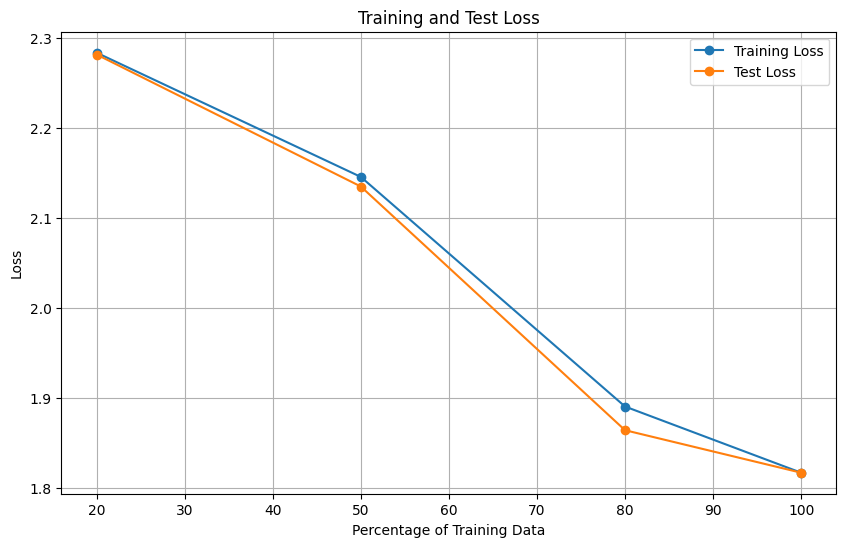

In [14]:
train_size = len(train_data)

# Create new data loaders with 20%, 50%, and 80% of the training data
train_sampler_20 = torch.utils.data.RandomSampler(
    train_data, replacement=True, num_samples=int(0.2 * train_size)
)
train_loader_20 = torch.utils.data.DataLoader(
    train_data, batch_size=HYPERPARAMETERS["batch_size"], sampler=train_sampler_20
)

train_sampler_50 = torch.utils.data.RandomSampler(
    train_data, replacement=True, num_samples=int(0.5 * train_size)
)
train_loader_50 = torch.utils.data.DataLoader(
    train_data, batch_size=HYPERPARAMETERS["batch_size"], sampler=train_sampler_50
)

train_sampler_80 = torch.utils.data.RandomSampler(
    train_data, replacement=True, num_samples=int(0.8 * train_size)
)
train_loader_80 = torch.utils.data.DataLoader(
    train_data, batch_size=HYPERPARAMETERS["batch_size"], sampler=train_sampler_80
)

# Train the model with 20% of the data
le_net_20 = LeNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(le_net_20.parameters(), lr=HYPERPARAMETERS["learning_rate"])

le_net_20_history = train(
    le_net_20,
    optimizer,
    criterion,
    train_loader_20,
    val_loader,
    epochs=HYPERPARAMETERS["epochs"],
    device=DEVICE,
)

le_net_20_test = test(le_net_20, test_loader, criterion, device=DEVICE)

# Train the model with 50% of the data
le_net_50 = LeNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(le_net_50.parameters(), lr=HYPERPARAMETERS["learning_rate"])

le_net_50_history = train(
    le_net_50,
    optimizer,
    criterion,
    train_loader_50,
    val_loader,
    epochs=HYPERPARAMETERS["epochs"],
    device=DEVICE,
)

le_net_50_test = test(le_net_50, test_loader, criterion, device=DEVICE)

# Train the model with 80% of the data
le_net_80 = LeNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(le_net_80.parameters(), lr=HYPERPARAMETERS["learning_rate"])

le_net_80_history = train(
    le_net_80,
    optimizer,
    criterion,
    train_loader_80,
    val_loader,
    epochs=HYPERPARAMETERS["epochs"],
    device=DEVICE,
)

le_net_80_test = test(le_net_80, test_loader, criterion, device=DEVICE)

# Train the model with 100% of the data
le_net_100 = LeNet()

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    le_net_100.parameters(), lr=HYPERPARAMETERS["learning_rate"]
)

le_net_100_history = train(
    le_net_100,
    optimizer,
    criterion,
    train_loader,
    val_loader,
    epochs=HYPERPARAMETERS["epochs"],
    device=DEVICE,
)

# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(
    [20, 50, 80, 100],
    [
        le_net_20_history["train_loss"][-1],
        le_net_50_history["train_loss"][-1],
        le_net_80_history["train_loss"][-1],
        le_net_100_history["train_loss"][-1],
    ],
    marker="o",
    label="Training Loss",
)
plt.plot(
    [20, 50, 80, 100],
    [
        le_net_20_test["test_loss"],
        le_net_50_test["test_loss"],
        le_net_80_test["test_loss"],
        le_net_100_history["train_loss"][-1],
    ],
    marker="o",
    label="Test Loss",
)
plt.xlabel("Percentage of Training Data")
plt.ylabel("Loss")
plt.title("Training and Test Loss")
plt.legend()
plt.grid(True)
plt.show()

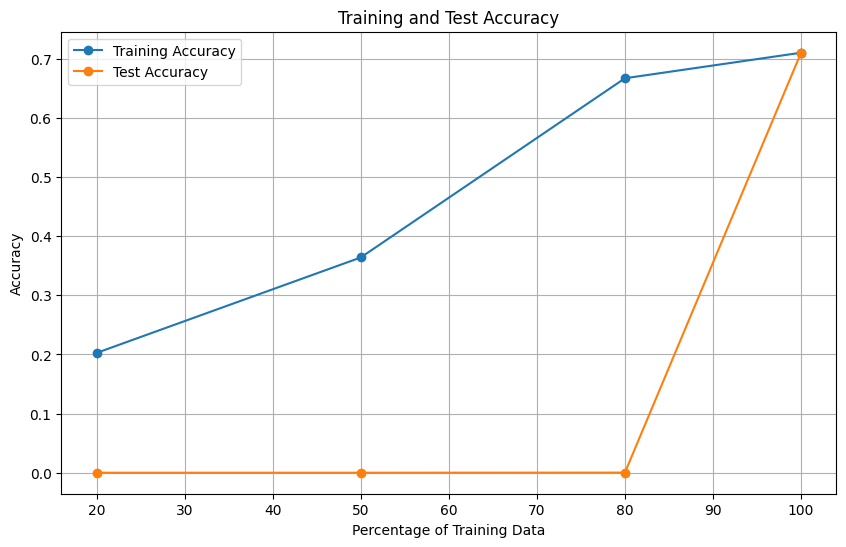

In [15]:
# Plot training and test accuracy
plt.figure(figsize=(10, 6))
plt.plot(
    [20, 50, 80, 100],
    [
        le_net_20_history["train_accuracy"][-1],
        le_net_50_history["train_accuracy"][-1],
        le_net_80_history["train_accuracy"][-1],
        le_net_100_history["train_accuracy"][-1],
    ],
    marker="o",
    label="Training Accuracy",
)
plt.plot(
    [20, 50, 80, 100],
    [
        le_net_20_test["test_accuracy"],
        le_net_50_test["test_accuracy"],
        le_net_80_test["test_accuracy"],
        le_net_100_history["train_accuracy"][-1],
    ],
    marker="o",
    label="Test Accuracy",
)
plt.xlabel("Percentage of Training Data")
plt.ylabel("Accuracy")
plt.title("Training and Test Accuracy")
plt.legend()
plt.grid(True)
plt.show()

We can observe that as the training size increases, the test accuracy also increases. This is because as the training size increases, the model has more data to learn from and can generalize better to new data. This is especially true for complex models like deep neural networks, which require a large amount of data to learn the parameters. As the training size increases, the model can learn more about the underlying distribution of the data and make better predictions on new data. This is why it is important to use as much data as possible when training deep neural networks.

### Question 4
How can we improve the accuracies for cases with fewer training samples? Implement your idea and compare against what you have in question 3.

#### Answer
We can use techniques of data augmenation to improve the accuracies for cases with fewer training samples. Data augmentation involves applying random transformations to the input images such as rotation, scaling, and translation. This can help to increase the size of the training data and improve the generalization of the model.

The implementation of the LeNet architecture with data augmentation is as follows:

In [16]:
# Create a new data loader with 100% of the training data and some data augmentation
aug_transform = transforms.Compose(
    [
        transforms.RandomRotation(20),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]
)

base_train_data = datasets.MNIST(
    "../data",
    train=True,
    download=True,
    transform=aug_transform,
    target_transform=one_hot_transform,
)

augmented_dataset = torch.utils.data.ConcatDataset([train_data, base_train_data])

train_sampler_20_aug = torch.utils.data.RandomSampler(
    augmented_dataset, replacement=True, num_samples=int(0.2 * train_size)
)

train_loader_20_aug = torch.utils.data.DataLoader(
    augmented_dataset,
    batch_size=HYPERPARAMETERS["batch_size"],
    sampler=train_sampler_20_aug,
)

train_sampler_50_aug = torch.utils.data.RandomSampler(
    augmented_dataset, replacement=True, num_samples=int(0.5 * train_size)
)

train_loader_50_aug = torch.utils.data.DataLoader(
    augmented_dataset,
    batch_size=HYPERPARAMETERS["batch_size"],
    sampler=train_sampler_50_aug,
)

train_sampler_80_aug = torch.utils.data.RandomSampler(
    augmented_dataset, replacement=True, num_samples=int(0.8 * train_size)
)

train_loader_80_aug = torch.utils.data.DataLoader(
    augmented_dataset,
    batch_size=HYPERPARAMETERS["batch_size"],
    sampler=train_sampler_80_aug,
)

train_sampler_aug = torch.utils.data.RandomSampler(
    augmented_dataset, replacement=True, num_samples=train_size
)

train_loader_aug = torch.utils.data.DataLoader(
    augmented_dataset,
    batch_size=HYPERPARAMETERS["batch_size"],
    sampler=train_sampler_aug,
)

# Train the model with 20% of the data
le_net_20_aug = LeNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    le_net_20_aug.parameters(), lr=HYPERPARAMETERS["learning_rate"]
)

le_net_20_aug_history = train(
    le_net_20_aug,
    optimizer,
    criterion,
    train_loader_20_aug,
    val_loader,
    epochs=HYPERPARAMETERS["epochs"],
    device=DEVICE,
)

le_net_20_aug_test = test(le_net_20_aug, test_loader, criterion, device=DEVICE)

# Train the model with 50% of the data
le_net_50_aug = LeNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    le_net_50_aug.parameters(), lr=HYPERPARAMETERS["learning_rate"]
)

le_net_50_aug_history = train(
    le_net_50_aug,
    optimizer,
    criterion,
    train_loader_50_aug,
    val_loader,
    epochs=HYPERPARAMETERS["epochs"],
    device=DEVICE,
)

le_net_50_aug_test = test(le_net_50_aug, test_loader, criterion, device=DEVICE)

# Train the model with 80% of the data
le_net_80_aug = LeNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    le_net_80_aug.parameters(), lr=HYPERPARAMETERS["learning_rate"]
)

le_net_80_aug_history = train(
    le_net_80_aug,
    optimizer,
    criterion,
    train_loader_80_aug,
    val_loader,
    epochs=HYPERPARAMETERS["epochs"],
    device=DEVICE,
)

le_net_80_aug_test = test(le_net_80_aug, test_loader, criterion, device=DEVICE)


# Train the model with 100% of the data
le_net_100_aug = LeNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    le_net_100_aug.parameters(), lr=HYPERPARAMETERS["learning_rate"]
)

le_net_100_aug_history = train(
    le_net_100_aug,
    optimizer,
    criterion,
    train_loader_aug,
    val_loader,
    epochs=HYPERPARAMETERS["epochs"],
    device=DEVICE,
)

Model moved to mps.
++++++++++ MODEL TRAINING STARTS ++++++++++
Epoch  1/15 Batch: [79/79] Train Loss: 2.3023 Train Accuracy: 0.1321 Val Loss: 2.3019 Val Accuracy: 0.1651
Epoch  2/15 Batch: [79/79] Train Loss: 2.3016 Train Accuracy: 0.1642 Val Loss: 2.3012 Val Accuracy: 0.1931
Epoch  3/15 Batch: [79/79] Train Loss: 2.3008 Train Accuracy: 0.1885 Val Loss: 2.3004 Val Accuracy: 0.2183
Epoch  4/15 Batch: [79/79] Train Loss: 2.3000 Train Accuracy: 0.2159 Val Loss: 2.2996 Val Accuracy: 0.2355
Epoch  5/15 Batch: [79/79] Train Loss: 2.2996 Train Accuracy: 0.2180 Val Loss: 2.2988 Val Accuracy: 0.2529
Epoch  6/15 Batch: [79/79] Train Loss: 2.2988 Train Accuracy: 0.2419 Val Loss: 2.2981 Val Accuracy: 0.2850
Epoch  7/15 Batch: [79/79] Train Loss: 2.2979 Train Accuracy: 0.2940 Val Loss: 2.2973 Val Accuracy: 0.3353
Epoch  8/15 Batch: [79/79] Train Loss: 2.2975 Train Accuracy: 0.3112 Val Loss: 2.2965 Val Accuracy: 0.3507
Epoch  9/15 Batch: [79/79] Train Loss: 2.2965 Train Accuracy: 0.3186 Val Loss: 2

In [18]:
le_net_100_aug_test = test(le_net_100_aug, test_loader, criterion, device=DEVICE)

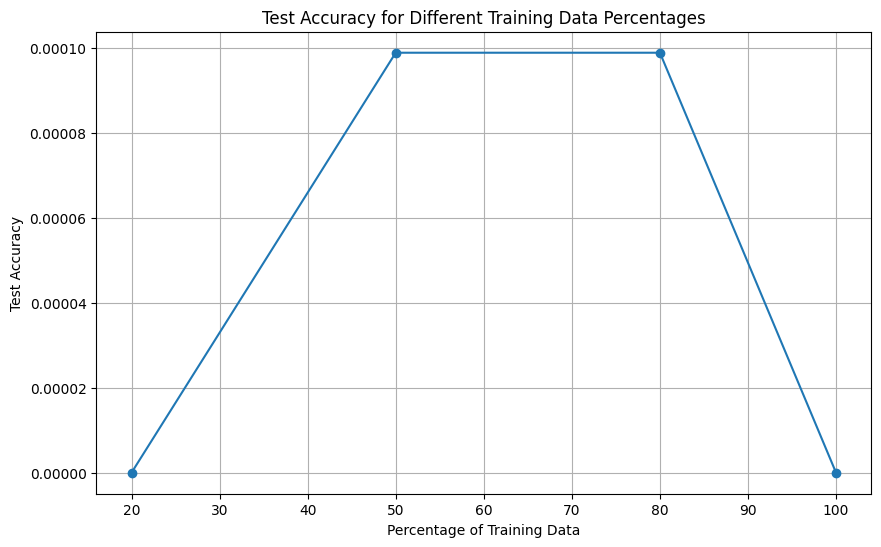

In [20]:
# Plot test accuracy for each model
plt.figure(figsize=(10, 6))
plt.plot(
    [20, 50, 80, 100],
    [
        le_net_20_aug_test["test_accuracy"],
        le_net_50_aug_test["test_accuracy"],
        le_net_80_aug_test["test_accuracy"],
        le_net_100_aug_test["test_accuracy"],
    ],
    marker="o",
)
plt.xlabel("Percentage of Training Data")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy for Different Training Data Percentages")
plt.grid(True)
plt.show()

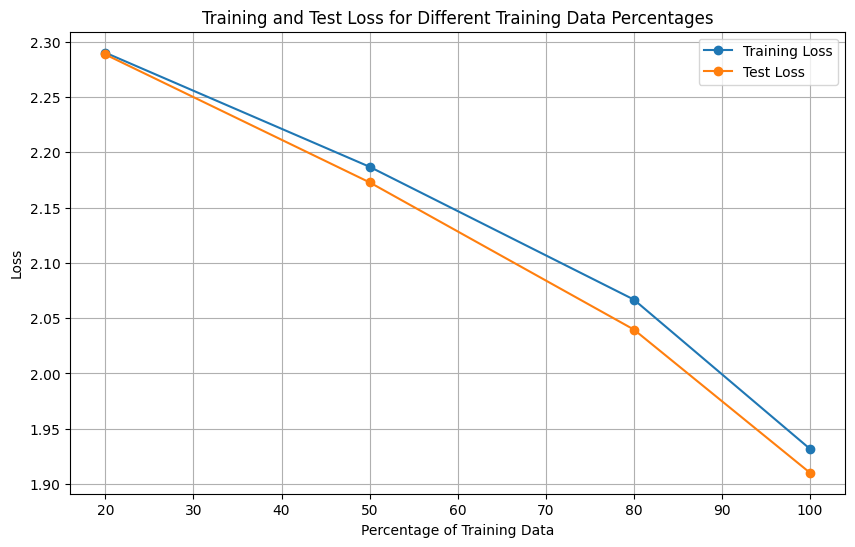

In [22]:
# Plot training and test loss for each model
plt.figure(figsize=(10, 6))
plt.plot(
    [20, 50, 80, 100],
    [
        le_net_20_aug_history["train_loss"][-1],
        le_net_50_aug_history["train_loss"][-1],
        le_net_80_aug_history["train_loss"][-1],
        le_net_100_aug_history["train_loss"][-1],
    ],
    marker="o",
    label="Training Loss",
)
plt.plot(
    [20, 50, 80, 100],
    [
        le_net_20_aug_test["test_loss"],
        le_net_50_aug_test["test_loss"],
        le_net_80_aug_test["test_loss"],
        le_net_100_aug_test["test_loss"],
    ],
    marker="o",
    label="Test Loss",
)
plt.xlabel("Percentage of Training Data")
plt.ylabel("Loss")
plt.title("Training and Test Loss for Different Training Data Percentages")
plt.legend()
plt.grid(True)
plt.show()

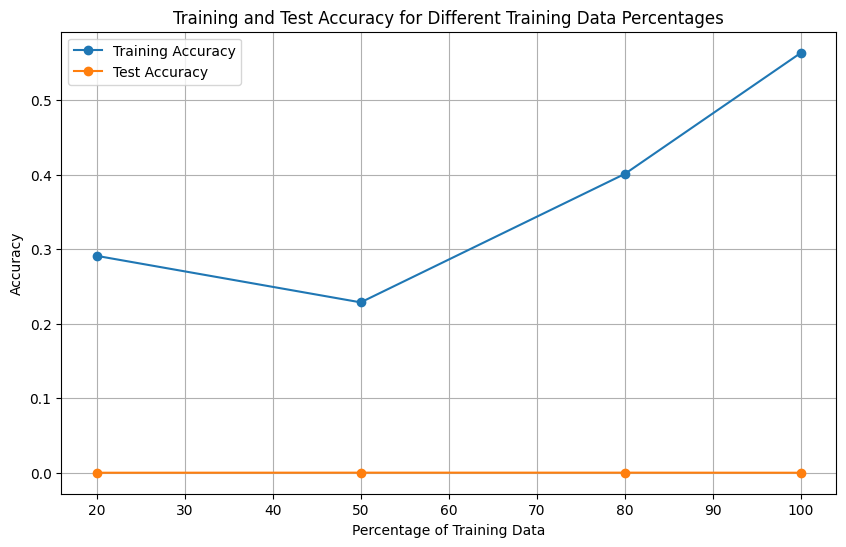

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(
    [20, 50, 80, 100],
    [
        le_net_20_aug_history["train_accuracy"][-1],
        le_net_50_aug_history["train_accuracy"][-1],
        le_net_80_aug_history["train_accuracy"][-1],
        le_net_100_aug_history["train_accuracy"][-1],
    ],
    marker="o",
    label="Training Accuracy",
)
plt.plot(
    [20, 50, 80, 100],
    [
        le_net_20_aug_test["test_accuracy"],
        le_net_50_aug_test["test_accuracy"],
        le_net_80_aug_test["test_accuracy"],
        le_net_100_aug_test["test_accuracy"],
    ],
    marker="o",
    label="Test Accuracy",
)
plt.xlabel("Percentage of Training Data")
plt.ylabel("Accuracy")
plt.title("Training and Test Accuracy for Different Training Data Percentages")
plt.legend()
plt.grid(True)
plt.show()

For both Q3, Q4 we can see an increased test accuracy as the training size increases. But in Q4 this increase is more significant. This is because of the data augmentation which increases the size of the training data and improves the generalization of the model. This is especially important for cases with fewer training samples, where the model may not have enough data to learn the parameters. Data augmentation can help to increase the size of the training data and improve the generalization of the model.